<h1> Reading the Dataset

In [38]:
import numpy as np
import pandas as pd
data = pd.read_csv("housing_prices_SLR.csv")

In [39]:
X = data[["AREA"]].values
data.PRICE = np.round(data.PRICE/1000)
Y = data[["PRICE"]].values

<h1> Splitting the data into Train and Test sets

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

<h1> Using Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

<h1>Predicting using the trained linear regression model 

In [42]:
y_pred = regressor.predict(x_test)

<h1>Plotting given data and comparing it with our predicted data

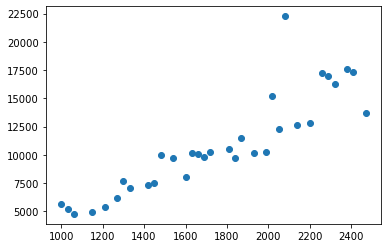

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train) 

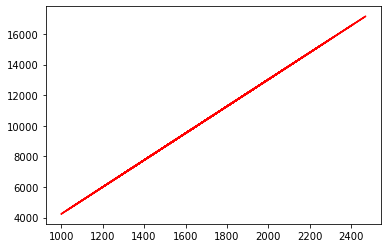

In [44]:
plt.plot(x_train, regressor.predict(x_train), color = 'red')

Text(0.5, 1.0, 'House Area vs House Prince (Train)')

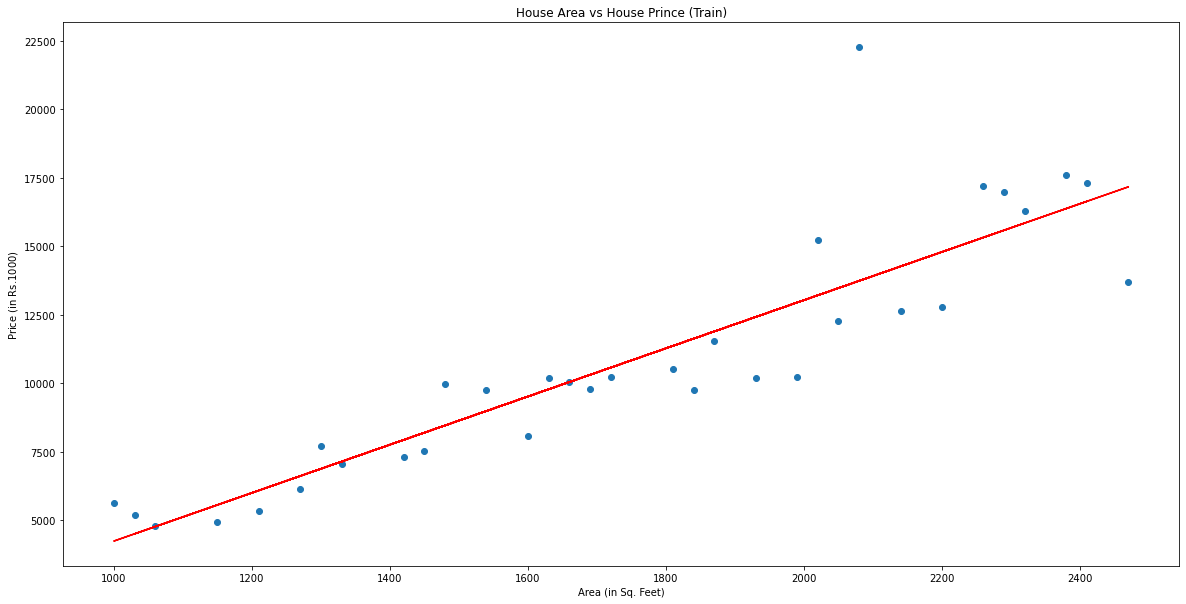

In [45]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train)
ax.plot(x_train, regressor.predict(x_train), color = 'red')
ax.set_xlabel("Area (in Sq. Feet)")
ax.set_ylabel("Price (in Rs.$1000$)")
ax.set_title("House Area vs House Prince (Train)")


<h1>Analyzing the viability of the model
<h2>By comparing the sse of baseline model and the regressor model

In [46]:
baseline_pred = np.round(y_train.mean())
print('Baseline Prediction:', baseline_pred )

Baseline Prediction: 10794.0


In [47]:
diff = y_train - baseline_pred
squared_diff = diff**2
sse = squared_diff.sum()
print("Baseling Model SSE:", sse)
y_train_pred = regressor.predict(x_train)
sse_train = ((y_train - y_train_pred)**2).sum()
print("Regression Model SSE:", sse_train)
print("Difference:", (sse-sse_train))


Baseling Model SSE: 607396454.0
Regression Model SSE: 131819322.75993812
Difference: 475577131.2400619


<h3>Our regressor model is better than the baseline model as it has a lower sse score
<br>
<h1>Analyzing the viability of the model
<h2>By using R-Squared Score

In [48]:
from sklearn.metrics import r2_score
baseline_score = r2_score(y_train, [baseline_pred]*len(y_train))
model_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_pred)
print("Baseline R-Squared Score:", baseline_score)
print("Train R-Squared Score:", model_score)
print("Test R-Squared Score:", test_score)

Baseline R-Squared Score: -4.989003654642943e-09
Train R-Squared Score: 0.7829764685824372
Test R-Squared Score: 0.7145334995892115


<h2>As the Test and Train Score are comparable therefore we can say that our model has good performance